# How close are previous algorithms to the smallest possible sample size and how much closer can we get with SampLNS

We don't know the actual smallest possible sample sizes, but we have a lower bound that we can use.


Let us first load the data from the experiment with solved each of the 44 small to medium instance 5 times with each of the previous algorithms. Then these samples were optimized for 900s by SampLNS.

In [20]:
import pandas as pd

In [21]:
samplns_data = pd.read_json("./05_clean_data.json.zip")
baseline_data = pd.read_json("./00_simple_baseline_data.json.zip")
from _conf import EXTENDED_BASELINE_DATA
extended_baseline_data = pd.read_json(EXTENDED_BASELINE_DATA)
extended_baseline_data = pd.concat([baseline_data, extended_baseline_data])
baseline_data

,instance_name,num_vars,num_clauses,baseline_alg,baseline_alg_conf,runtime,sample_size,path_to_baseline_sample
0,calculate,9,15,FIDE-ICPL,t2,1.484,9.0,2023-03-01_13-51-03/1_1_0_1_sample.csv
1,calculate,9,15,FIDE-ICPL,t2,1.280,9.0,2023-03-01_13-51-03/1_1_0_2_sample.csv
2,calculate,9,15,FIDE-ICPL,t2,1.289,9.0,2023-03-01_13-51-03/1_1_0_3_sample.csv
3,calculate,9,15,FIDE-ICPL,t2,1.274,9.0,2023-03-01_13-51-03/1_1_0_4_sample.csv
4,calculate,9,15,FIDE-ICPL,t2,1.277,9.0,2023-03-01_13-51-03/1_1_0_5_sample.csv
...,...,...,...,...,...,...,...,...
2745,freetz,31012,102705,YASA,t2_m10_null,900.008,NaN,None
2746,freetz,31012,102705,YASA,t2_m10_null,900.008,NaN,None
2747,freetz,31012,102705,YASA,t2_m10_null,900.010,NaN,None
2748,freetz,31012,102705,YASA,t2_m10_null,900.009,NaN,None


In [22]:
extended_baseline_data

,instance_name,num_vars,num_clauses,baseline_alg,baseline_alg_conf,runtime,sample_size,path_to_baseline_sample
0,calculate,9,15,FIDE-ICPL,t2,1.484,9.0,2023-03-01_13-51-03/1_1_0_1_sample.csv
1,calculate,9,15,FIDE-ICPL,t2,1.280,9.0,2023-03-01_13-51-03/1_1_0_2_sample.csv
2,calculate,9,15,FIDE-ICPL,t2,1.289,9.0,2023-03-01_13-51-03/1_1_0_3_sample.csv
3,calculate,9,15,FIDE-ICPL,t2,1.274,9.0,2023-03-01_13-51-03/1_1_0_4_sample.csv
4,calculate,9,15,FIDE-ICPL,t2,1.277,9.0,2023-03-01_13-51-03/1_1_0_5_sample.csv
...,...,...,...,...,...,...,...,...
507,m5272c3,1336,3111,ACTS-IPOF-CSP,t2,900030.000,NaN,None
508,sam7ex256,1345,3155,ACTS-IPOF-CSP,t2,900028.000,NaN,None
509,phycore229x,1373,3185,ACTS-IPOF-CSP,t2,900032.000,NaN,None
510,FreeBSD-8_0_0,1397,15692,ACTS-IPOF-CSP,t2,900009.000,NaN,None


In [23]:
baseline_data = extended_baseline_data

In [24]:
best_lower_bound = samplns_data.groupby(["instance_name"])["lower_bound"].max().reset_index().rename(columns={"lower_bound": "best_lower_bound"})
best_lower_bound.to_json("./out/07_best_lower_bounds.json.zip")
best_lower_bound


,instance_name,best_lower_bound
0,APL,7
1,APL-Model,8
2,BankingSoftware,28
3,BattleofTanks,256
4,ChatClient,7
5,DMIE,16
6,E-Shop,8
7,EMBToolkit,1841
8,FameDB,8
9,FeatureIDE,7


In [25]:
best_lower_bound["internal_best"] = best_lower_bound["best_lower_bound"]
from _conf import EXTERNAL_BOUNDS
external_best_lb = pd.concat([pd.read_csv(p) for p in EXTERNAL_BOUNDS]).groupby(["instance_name"])["best_lower_bound"].max().reset_index()
best_lower_bound = pd.concat([best_lower_bound, external_best_lb]).groupby(["instance_name"])[["best_lower_bound", "internal_best"]].max().reset_index()
best_lower_bound

,instance_name,best_lower_bound,internal_best
0,APL,7,7.0
1,APL-Model,8,8.0
2,BankingSoftware,28,28.0
3,BattleofTanks,256,256.0
4,ChatClient,7,7.0
5,DMIE,16,16.0
6,E-Shop,10,8.0
7,EMBToolkit,1872,1841.0
8,FameDB,8,8.0
9,FeatureIDE,7,7.0


In [26]:
samplns_data = samplns_data[["instance_name", "upper_bound"]]
samplns_data = samplns_data.merge(best_lower_bound, on="instance_name")
samplns_data["gap"] =100*( 1- (samplns_data["best_lower_bound"]/ samplns_data["upper_bound"]))
samplns_data["algorithm_name"] = "SampLNS"
samplns_data

,instance_name,upper_bound,best_lower_bound,internal_best,gap,algorithm_name
0,integrator_arm7,47,32,32.0,31.914894,SampLNS
1,integrator_arm7,47,32,32.0,31.914894,SampLNS
2,integrator_arm7,44,32,32.0,27.272727,SampLNS
3,integrator_arm7,46,32,32.0,30.434783,SampLNS
4,integrator_arm7,43,32,32.0,25.581395,SampLNS
...,...,...,...,...,...,...
225,FreeBSD-8_0_0,64,30,30.0,53.125000,SampLNS
226,FreeBSD-8_0_0,68,30,30.0,55.882353,SampLNS
227,FreeBSD-8_0_0,63,30,30.0,52.380952,SampLNS
228,FreeBSD-8_0_0,63,30,30.0,52.380952,SampLNS


In [27]:
baseline_data = baseline_data[["instance_name", "sample_size", "baseline_alg", "baseline_alg_conf"]]
baseline_data = baseline_data.merge(best_lower_bound, on="instance_name")
baseline_data["gap"] = 100*(1-(baseline_data["best_lower_bound"]/baseline_data["sample_size"]))
def baseline_alg_name(row):
    settings = row["baseline_alg_conf"]
    if "_m" in settings:
        m = settings.split("_m")[-1].split("_")[0]
        return f"{row['baseline_alg']}(m={m})"
    return row["baseline_alg"]
baseline_data["algorithm_name"] = baseline_data.apply(baseline_alg_name, axis=1)
#baseline_data.rename(columns={"baseline_alg": "Algorithm"})
baseline_data

,instance_name,sample_size,baseline_alg,baseline_alg_conf,best_lower_bound,internal_best,gap,algorithm_name
0,calculate,9.0,FIDE-ICPL,t2,5,5.0,44.444444,FIDE-ICPL
1,calculate,9.0,FIDE-ICPL,t2,5,5.0,44.444444,FIDE-ICPL
2,calculate,9.0,FIDE-ICPL,t2,5,5.0,44.444444,FIDE-ICPL
3,calculate,9.0,FIDE-ICPL,t2,5,5.0,44.444444,FIDE-ICPL
4,calculate,9.0,FIDE-ICPL,t2,5,5.0,44.444444,FIDE-ICPL
...,...,...,...,...,...,...,...,...
2653,ea2468,65.0,YASA,t2_m10_null,32,31.0,50.769231,YASA(m=10)
2654,ea2468,NaN,ACTS-IPOG-FT,t2,32,31.0,NaN,ACTS-IPOG-FT
2655,ea2468,NaN,ACTS-IPOG-CSP,t2,32,31.0,NaN,ACTS-IPOG-CSP
2656,ea2468,NaN,ACTS-IPOF-FT,t2,32,31.0,NaN,ACTS-IPOF-FT


In [28]:
gaps = pd.concat([samplns_data[["algorithm_name", "instance_name", "gap"]], baseline_data[['algorithm_name','instance_name', 'gap']]])
gaps

,algorithm_name,instance_name,gap
0,SampLNS,integrator_arm7,31.914894
1,SampLNS,integrator_arm7,31.914894
2,SampLNS,integrator_arm7,27.272727
3,SampLNS,integrator_arm7,30.434783
4,SampLNS,integrator_arm7,25.581395
...,...,...,...
2653,YASA(m=10),ea2468,50.769231
2654,ACTS-IPOG-FT,ea2468,NaN
2655,ACTS-IPOG-CSP,ea2468,NaN
2656,ACTS-IPOF-FT,ea2468,NaN


In [29]:
gaps["algorithm_name"].unique().tolist()

['SampLNS',
 'FIDE-ICPL',
 'FIDE-Chvatal',
 'Incling',
 'FIDE-YASA(m=1)',
 'FIDE-YASA(m=3)',
 'FIDE-YASA(m=5)',
 'FIDE-YASA(m=10)',
 'YASA(m=1)',
 'YASA(m=3)',
 'YASA(m=5)',
 'YASA(m=10)',
 'ACTS-IPOG-FT',
 'ACTS-IPOG-CSP',
 'ACTS-IPOF-FT',
 'ACTS-IPOF-CSP']

In [30]:
algorithm_selection = ['SampLNS',
 'FIDE-ICPL',
 'FIDE-Chvatal',
 'Incling',
 'FIDE-YASA(m=1)',
 'FIDE-YASA(m=3)',
 'FIDE-YASA(m=5)',
 'FIDE-YASA(m=10)',
  'ACTS-IPOG-FT',
 'ACTS-IPOG-CSP',
 'ACTS-IPOF-FT',
 'ACTS-IPOF-CSP']
t = gaps[gaps["algorithm_name"].isin(algorithm_selection)].copy()
t.dropna(inplace=True)
t = t.groupby("instance_name")[["algorithm_name"]].nunique()
instances_solved_by_all = t[t["algorithm_name"] == len(algorithm_selection)].index.tolist()
instances_solved_by_all

['APL',
 'APL-Model',
 'ChatClient',
 'FameDB',
 'FeatureIDE',
 'axTLS',
 'calculate',
 'car',
 'dell',
 'email',
 'gpl',
 'lcm']

In [31]:
print(len(instances_solved_by_all), "instances solved by all")

12 instances solved by all


In [32]:
t = gaps[gaps["instance_name"].isin(instances_solved_by_all)].copy()
t["Instances"] = f"Common subset [{len(instances_solved_by_all)}]"
gaps["Instances"] = "Ignore unsolved"
gaps = pd.concat([gaps, t], ignore_index=True)
gaps

,algorithm_name,instance_name,gap,Instances
0,SampLNS,integrator_arm7,31.914894,Ignore unsolved
1,SampLNS,integrator_arm7,31.914894,Ignore unsolved
2,SampLNS,integrator_arm7,27.272727,Ignore unsolved
3,SampLNS,integrator_arm7,30.434783,Ignore unsolved
4,SampLNS,integrator_arm7,25.581395,Ignore unsolved
...,...,...,...,...
3651,YASA(m=10),axTLS,37.500000,Common subset [12]
3652,ACTS-IPOG-FT,axTLS,47.368421,Common subset [12]
3653,ACTS-IPOG-CSP,axTLS,47.368421,Common subset [12]
3654,ACTS-IPOF-FT,axTLS,47.368421,Common subset [12]


In [33]:
gaps["solved"] = 0.0
gaps.loc[~gaps["gap"].isna(), "solved"]=1
gaps.groupby(["algorithm_name"])[["gap"]].mean()

,gap
algorithm_name,
ACTS-IPOF-CSP,33.355221
ACTS-IPOF-FT,34.227927
ACTS-IPOG-CSP,34.613582
ACTS-IPOG-FT,34.946004
FIDE-Chvatal,38.840425
FIDE-ICPL,38.837704
FIDE-YASA(m=1),34.577150
FIDE-YASA(m=10),27.671955
FIDE-YASA(m=3),29.430321


In [34]:
num_instances_solved_by_alg = gaps.dropna().groupby("algorithm_name")["instance_name"].nunique().to_dict()
num_instances_solved_by_alg

{'ACTS-IPOF-CSP': 13,
 'ACTS-IPOF-FT': 14,
 'ACTS-IPOG-CSP': 14,
 'ACTS-IPOG-FT': 14,
 'FIDE-Chvatal': 37,
 'FIDE-ICPL': 45,
 'FIDE-YASA(m=1)': 46,
 'FIDE-YASA(m=10)': 46,
 'FIDE-YASA(m=3)': 46,
 'FIDE-YASA(m=5)': 46,
 'Incling': 45,
 'SampLNS': 46,
 'YASA(m=1)': 46,
 'YASA(m=10)': 46,
 'YASA(m=3)': 46,
 'YASA(m=5)': 46}

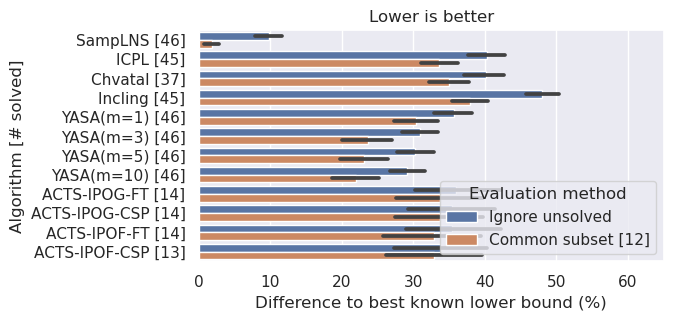

In [35]:

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

t = gaps[gaps["algorithm_name"].isin(algorithm_selection)].copy()

f, ax = plt.subplots(figsize=(6, 3))
t["algorithm_name"] = t["algorithm_name"].apply(lambda s: f"{s} [{num_instances_solved_by_alg[s]}]")
t["algorithm_name"] = t["algorithm_name"].str.replace("FIDE-", "")
plt.title("Lower is better")
sns.barplot(data=t, y="algorithm_name", x="gap", hue="Instances")
plt.xlabel("Difference to best known lower bound (%)")
plt.ylabel("Algorithm [# solved]")
plt.legend(loc="lower right", title="Evaluation method")
plt.xlim(0, 65)
plt.show()

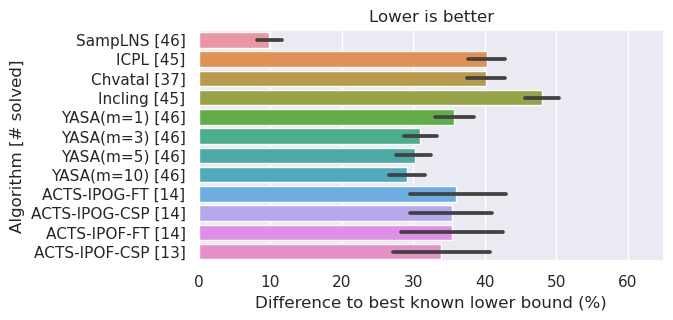

In [36]:

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

t = gaps[gaps["algorithm_name"].isin(algorithm_selection)].copy()
t = t[t["Instances"]=="Ignore unsolved"]
f, ax = plt.subplots(figsize=(6, 3))
t["algorithm_name"] = t["algorithm_name"].apply(lambda s: f"{s} [{num_instances_solved_by_alg[s]}]")
t["algorithm_name"] = t["algorithm_name"].str.replace("FIDE-", "")
plt.title("Lower is better")
sns.barplot(data=t, y="algorithm_name", x="gap")
plt.xlabel("Difference to best known lower bound (%)")
plt.ylabel("Algorithm [# solved]")
#plt.legend(loc="lower right", title="Evaluation method")
plt.xlim(0, 65)
plt.show()